In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
import re

In [31]:
path = os.getcwd() + "/../data/Google-Playstore-exploration.parquet"
df = pd.read_parquet(path, engine='fastparquet')

In [22]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Maximum Installs,Free,Price,Size,Released,Last Updated,Ad Supported,In App Purchases,Super Category,Rating Bin,Name Length,Size Cat,Time since last update,Days Release to Last Update,log10 Maximum Installs
index,,,,,,,,,,,,,,,,,,,,
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,15,True,0.0,10.0,2020-02-26,2020-02-26,False,False,Entertainment,NaN,7,Known,1,0.0,1.176091
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,7662,True,0.0,2.9,2020-05-21,2021-05-06,True,False,Other,Moderate,19,Known,0,350.0,3.884342
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,58,True,0.0,3.7,2019-08-09,2019-08-19,False,False,Development,NaN,6,Known,2,10.0,1.763428
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,19,True,0.0,1.8,2018-09-10,2018-10-13,True,False,Personal & Social,Superb,50,Known,3,33.0,1.278754
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,478,True,0.0,6.2,2020-02-21,2018-11-12,False,False,Other,NaN,7,Known,3,-466.0,2.679428


In [32]:
# pak een n sample vd dataframe
df_s = df.sample(n=10000, random_state=123) #small
df_t = df.sample(n=1000, random_state=123) #tiny
df_tt = df.sample(n=200, random_state=123) #teeny-tiny

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


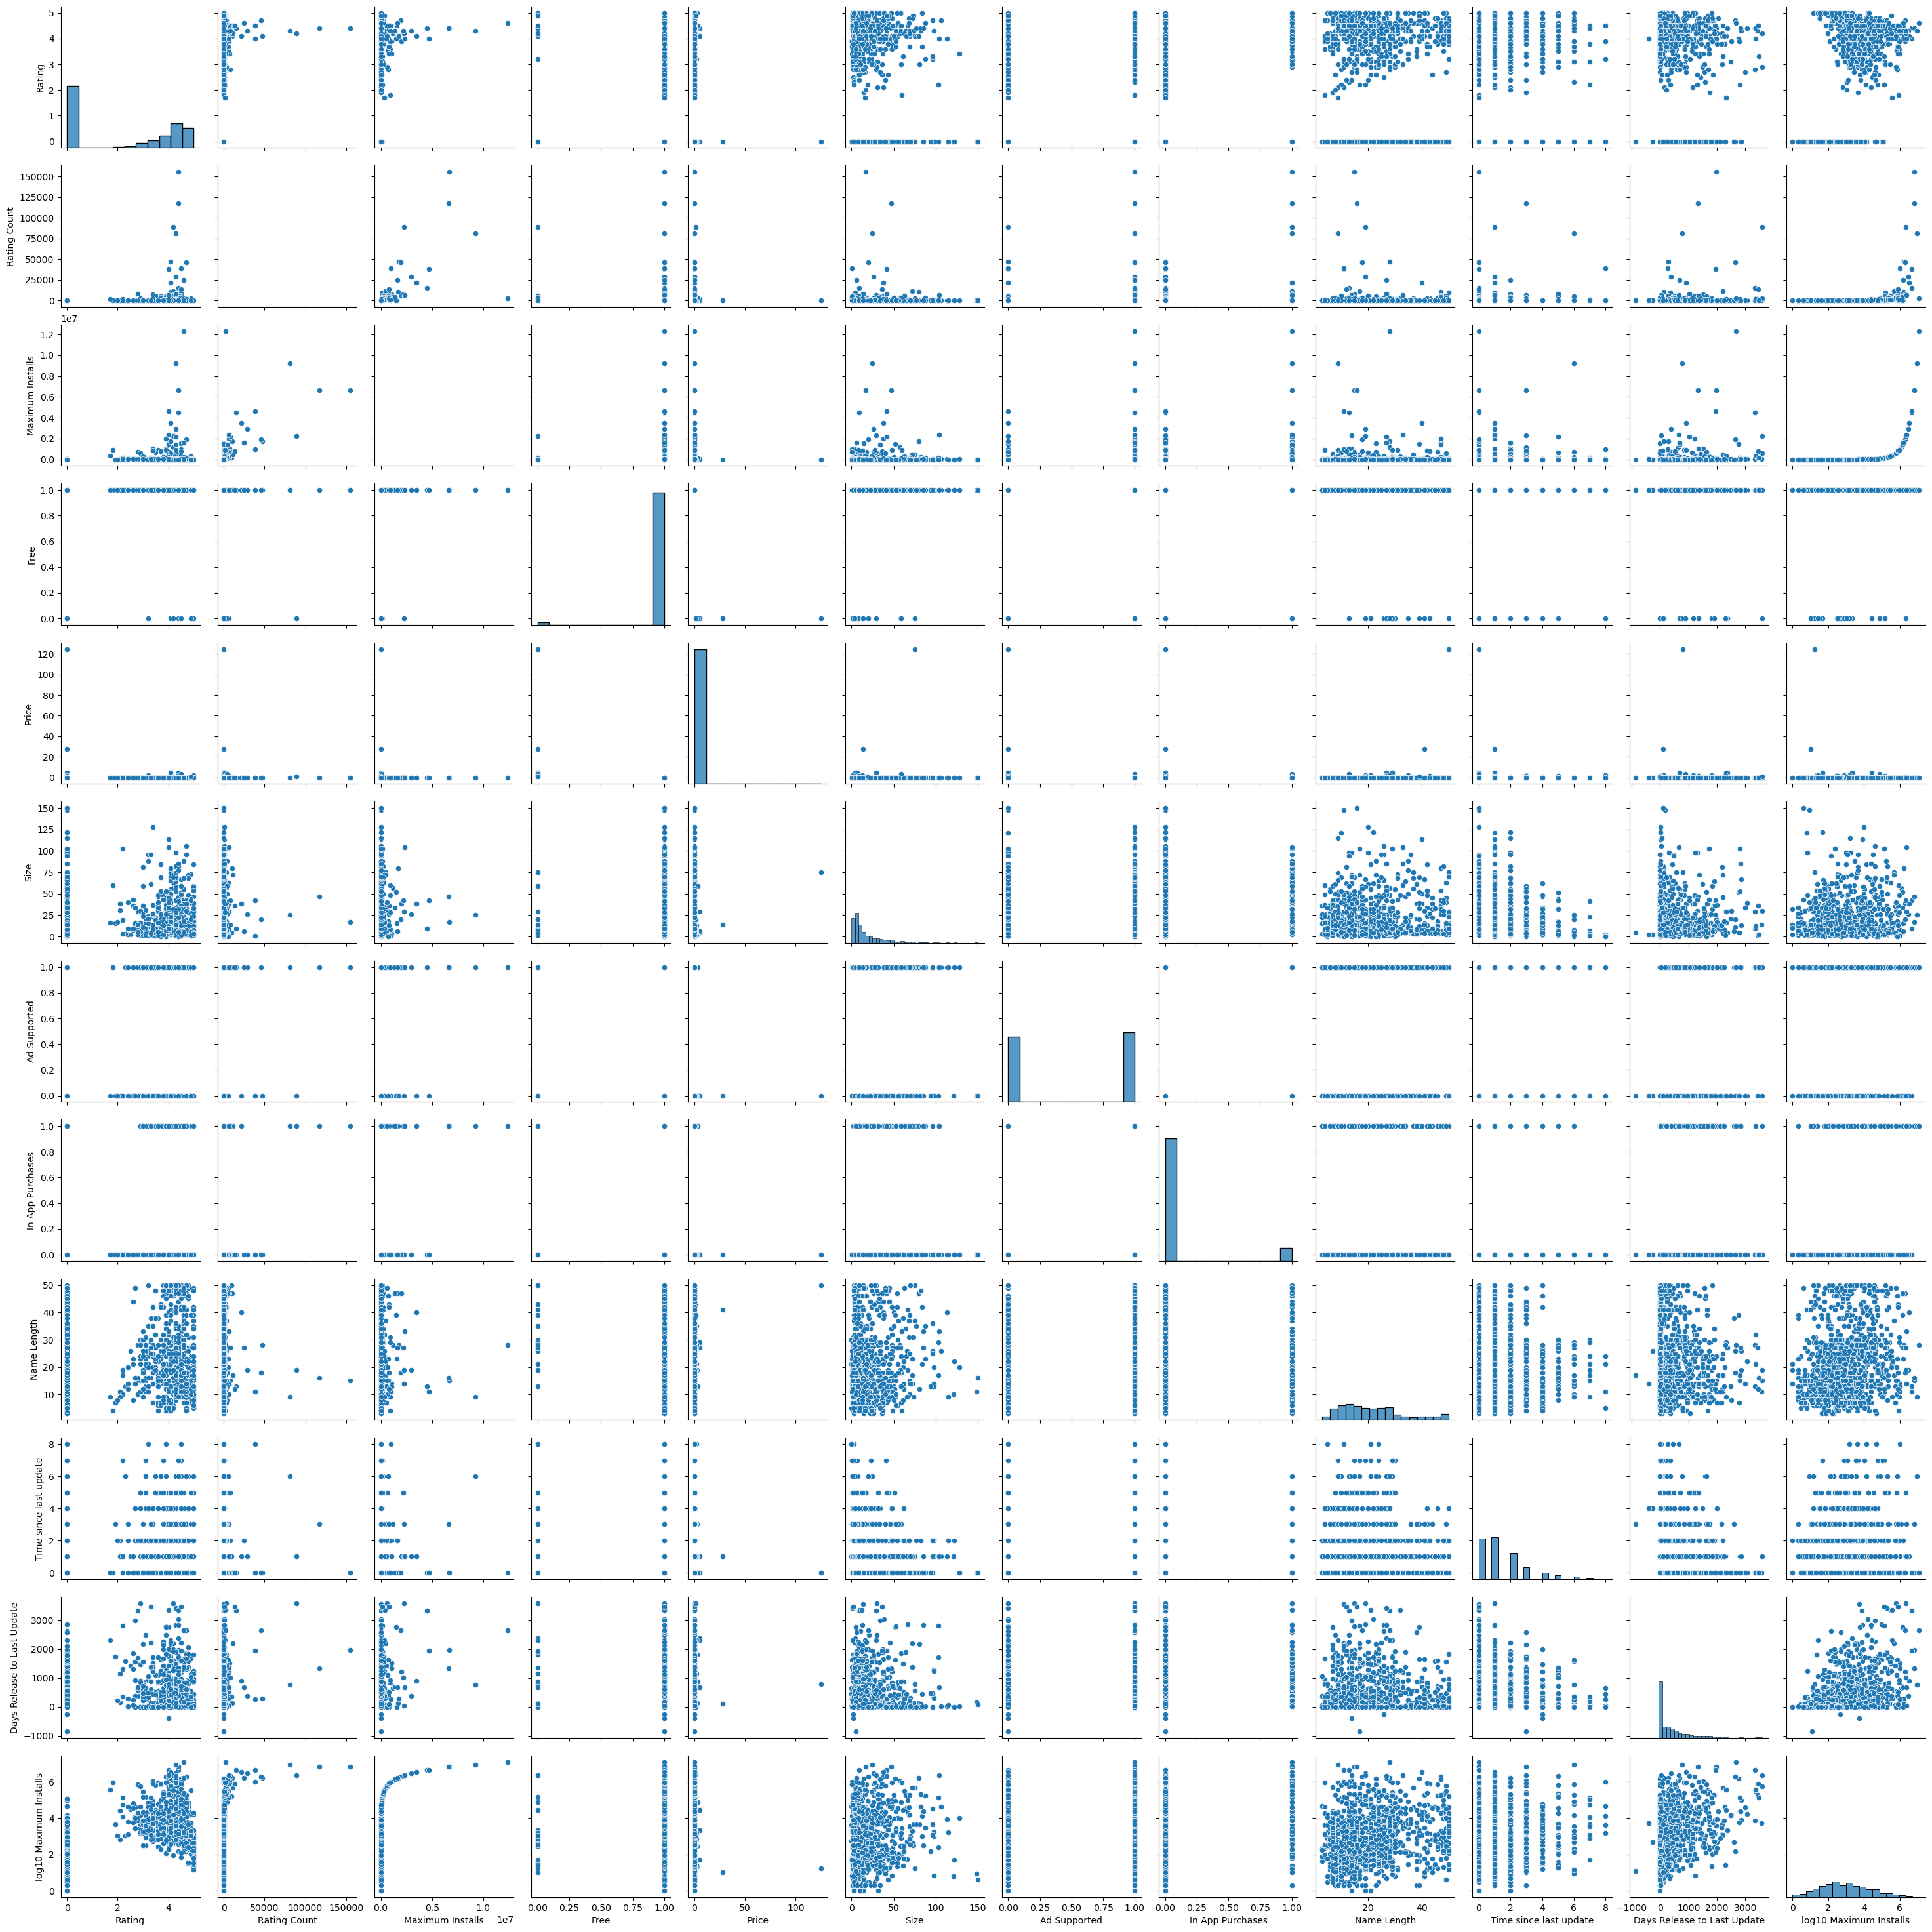

In [7]:
sns.pairplot(df_t)

In [33]:
log_transform_cols = ['Rating Count', 'Maximum Installs', 'Price', 'Size', 'Days Release to Last Update']
for col in log_transform_cols:
    df[col] = np.log(df[col]+1)
    df = df.rename(columns={col:('log10'+col)})

c:\Users\~LarsSpekschoorTrain\OneDrive - Smart Data People\Documenten\Praktijkopdracht\SDP_PO_123\envs\SDP_PO\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
df.head()

,App Name,App Id,Category,Rating,log10Rating Count,log10Maximum Installs,Free,log10Price,log10Size,Released,Last Updated,Ad Supported,In App Purchases,Super Category,Rating Bin,Name Length,Size Cat,Time since last update,log10Days Release to Last Update,log10 Maximum Installs
index,,,,,,,,,,,,,,,,,,,,
2205003,"MUSLapp - Find Gay Friends, Gay Dating, Gay Ho...",com.musl,Dating,3.2,3.912023,9.239996,True,0.0,2.282382,2020-08-25,2021-04-30,True,False,Personal & Social,Bad App Yo,50,Known,0,5.517453,4.012837
1743522,Nature Sounds Ringtone,savaliyainfotech.naturesoundsringtone,Music & Audio,0.0,0.000000,5.598422,True,0.0,2.639057,2017-05-12,2021-06-02,True,False,Other,NaN,22,Known,0,7.301822,2.429752
2097032,Prayer's Time Auto Silent and Qibla Finder Com...,com.smarttech.prayerstime,Lifestyle,4.8,3.401197,7.046647,True,0.0,2.484907,2019-11-09,2020-09-12,True,False,Personal & Social,Superb,50,Known,1,5.733341,3.059942
629612,spinning Ben Nott @ blancospin,com.Blancospin,Health & Fitness,0.0,0.000000,5.645447,True,0.0,2.995732,2015-10-13,2020-01-22,True,False,Personal & Social,NaN,30,Known,1,7.354362,2.450249
1908536,Indian recipes with photo offline,com.cook.catalog.database.indian,Food & Drink,4.5,3.970292,9.869207,True,0.0,2.708050,2018-02-20,2021-05-28,True,True,Other,Superb,33,Known,0,7.085064,4.286120


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


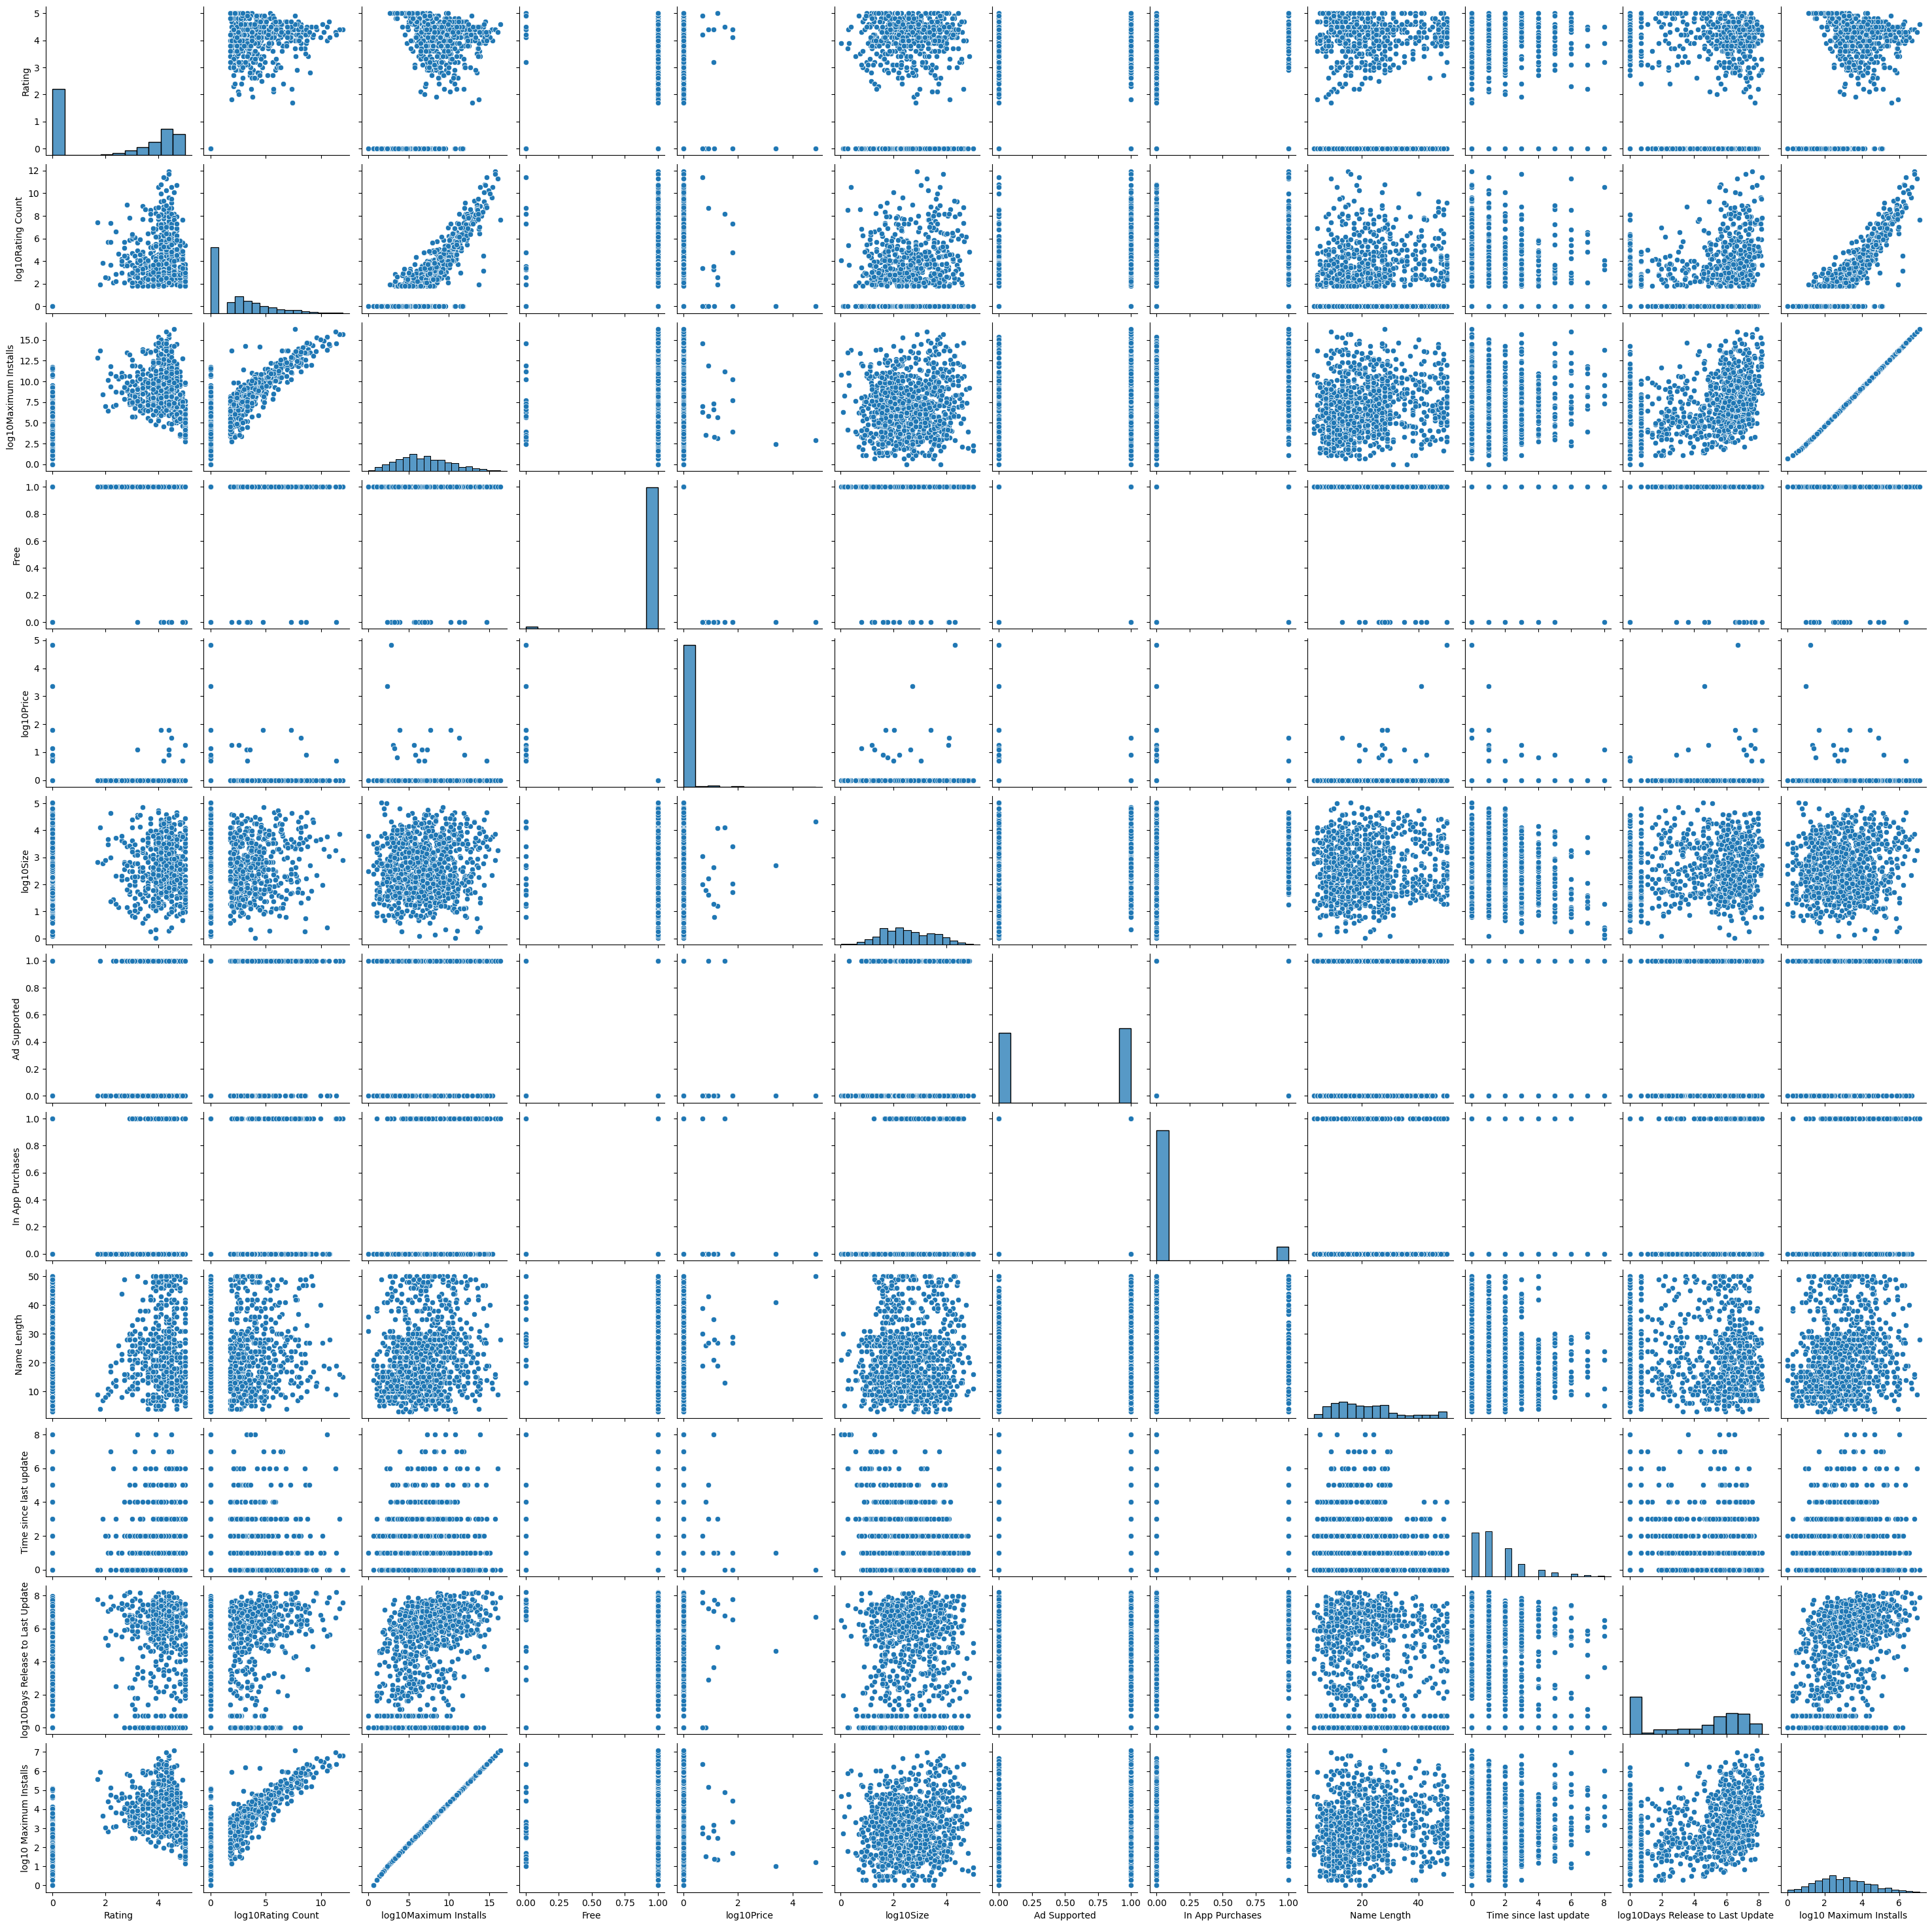

In [35]:
sns.pairplot(df)